<a href="https://colab.research.google.com/github/17520299/DS102.L11.CNCL/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!pip install detectron2==0.1.3 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html

Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
     |████████████████████████████████| 703.8MB 25kB/s 
     |████████████████████████████████| 6.6MB 20.0MB/s 
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101
  Found existing installation: torchvision 0.8.1+cu101
    Uninstalling torchvision-0.8.1+cu101:
      Successfully uninstalled torchvision-0.8.1+cu101
     |████████████████████████████████| 276kB 4.9MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp36-cp36m-linux_x86_64.whl size=44076 sha256=5e50b933c8eaae94c893fdd6c252da98aa75d3dcafa76e69e4eb35a38b11fffd
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip

In [2]:
import detectron2 
from detectron2.utils.logger import setup_logger
setup_logger()
import cv2
import numpy as np
import random
from google.colab.patches import cv2_imshow

from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 



In [ ]:
!wget https://www.dropbox.com/s/vzr55y4lqx7te2b/Dataset.zip
!unzip Dataset.zip

In [4]:
import json
from detectron2.structures import BoxMode
def get_traffic_dicts(imgdir):
  json_file = imgdir+'/data.json'
  with open(json_file) as f:
    dataset_dicts = json.load(f)
  for i in dataset_dicts:
    filename=i['file_name']
    i['file_name'] = imgdir+"/"+filename
    for j in i['annotations']:
      j['bbox_mode'] = BoxMode.XYWH_ABS
      j['category_id'] = int(j['category_id'])
  return dataset_dicts
from detectron2.data import DatasetCatalog, MetadataCatalog
for d in ['Train','Test']:
  DatasetCatalog.register('traffic_'+d,lambda d=d: get_traffic_dicts('/content/Dataset/'+d))
  MetadataCatalog.get('traffic_ '+d).set(thing_classes=['pedestrian','car','van','bus','truck','motor','bicycle','tricycle','other'])
traffic_metadata = MetadataCatalog.get('traffic_train')

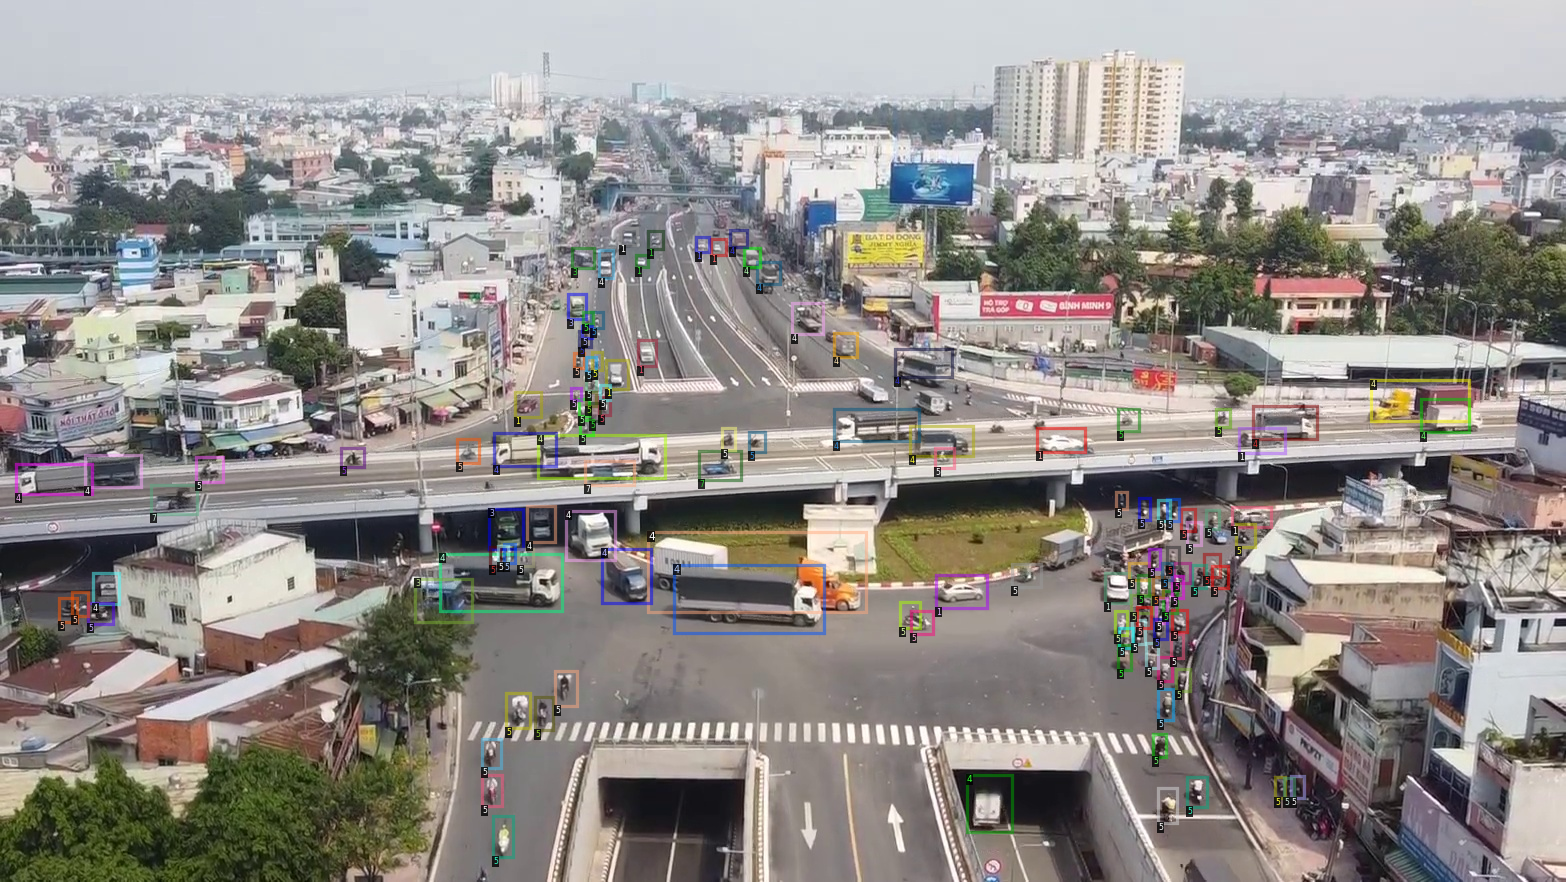

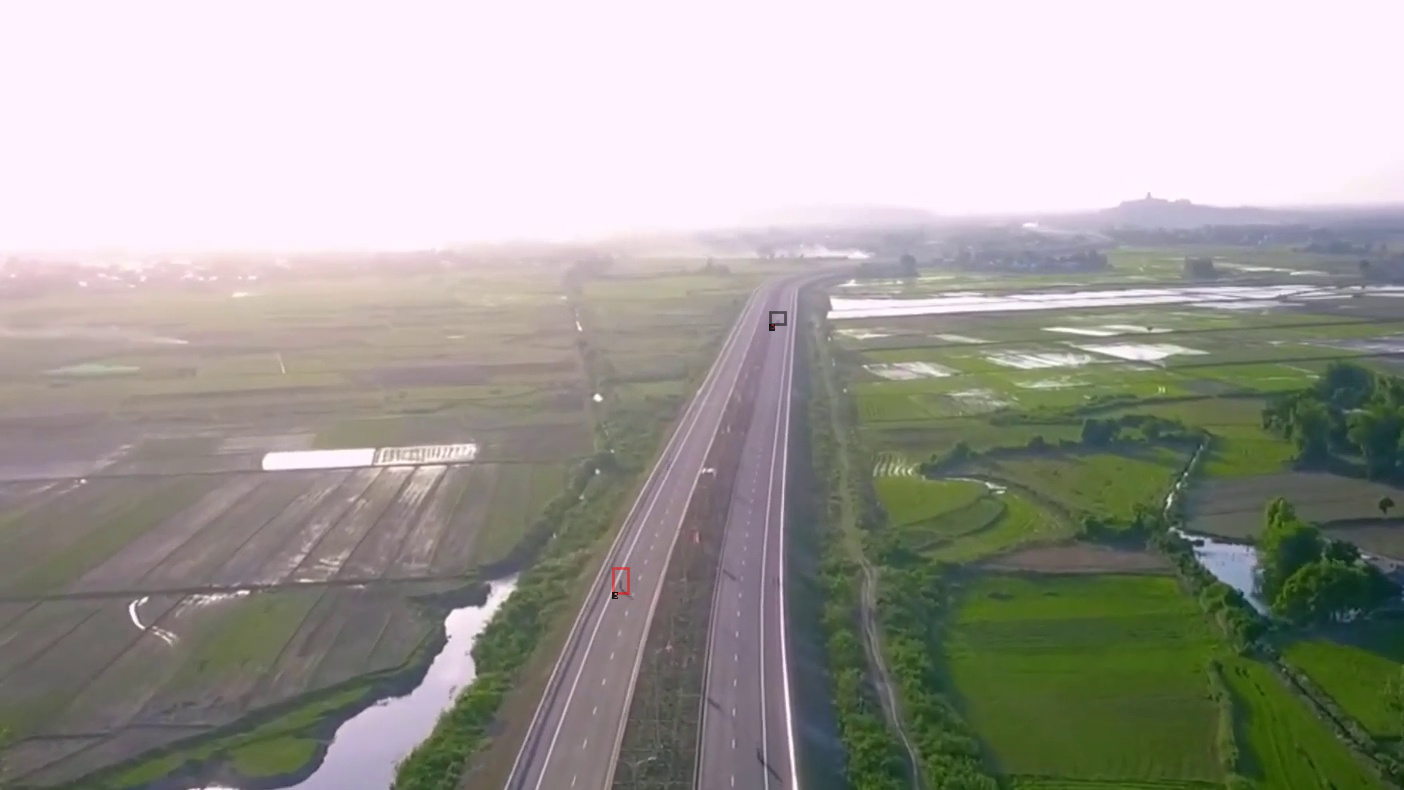

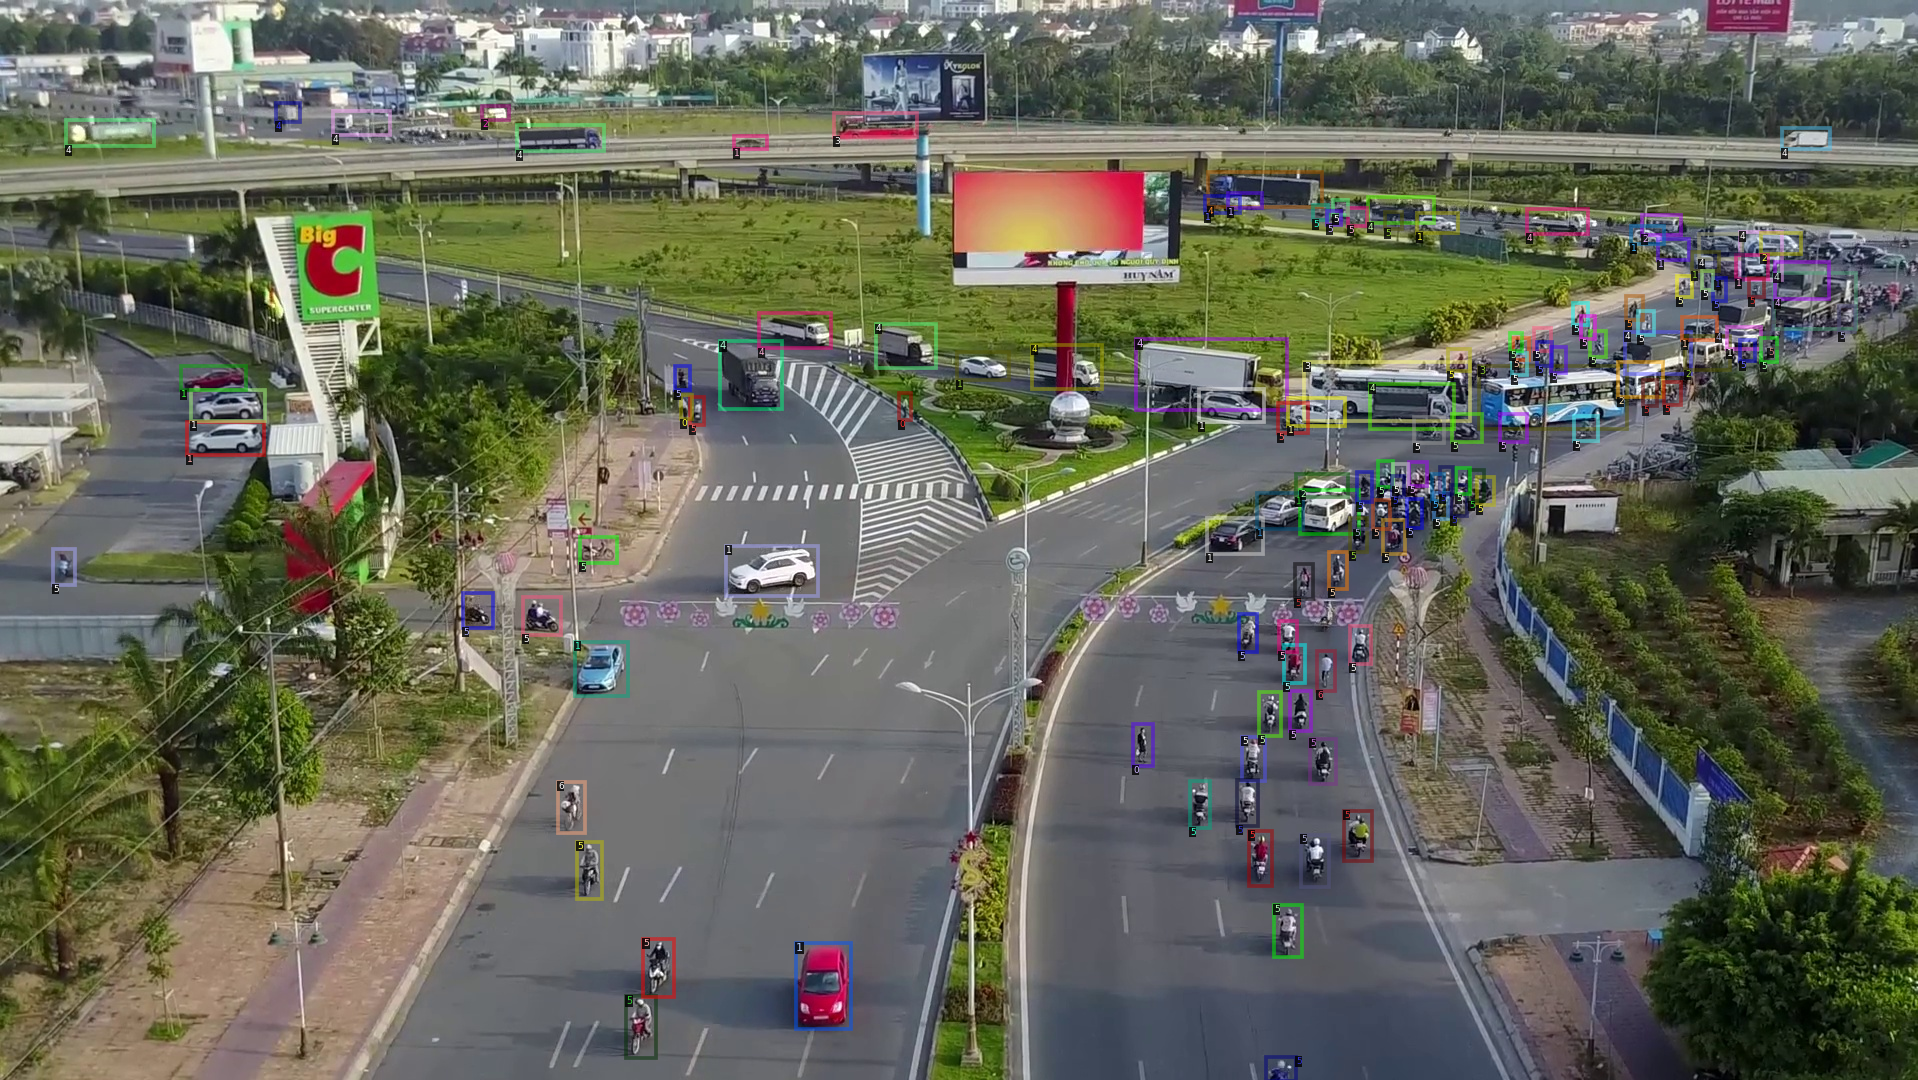

In [6]:
dataset_dicts = get_traffic_dicts('/content/Dataset/Train/')
for d in random.sample(dataset_dicts,3):
  img = cv2.imread(d['file_name'])
  visualizer = Visualizer(img[ :, :, ::-1], metadata=traffic_metadata)
  vis = visualizer.draw_dataset_dict(d)
  cv2_imshow(vis.get_image()[:,:,::-1])